## Logistic regression  

The logistic function:  

$$N(x) = \frac{K}{1 + \exp\left(-aK(x - x_0)\right)} \\
\frac{dN}{dt}= a\left(\frac{K-N}{K}\right)N$$
Typically, $K = 1$ and the following is used for regression:
$$f(x_i, a, x_0) = \frac{1}{1 + \exp\left(-a(x_i - x_0)\right)}$$

Logistic regression is used when $y_i = \{0,1\}$, or if it is boolean.  
Classifies Class A $\iff y_i = 0$, Class B $\iff y_i = 1$  

The **sigmoid function** is a special case of the logistic function when 
$K=1, x_0=0$:
$$f(x) = \frac{1}{1 + \exp(-ax)}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

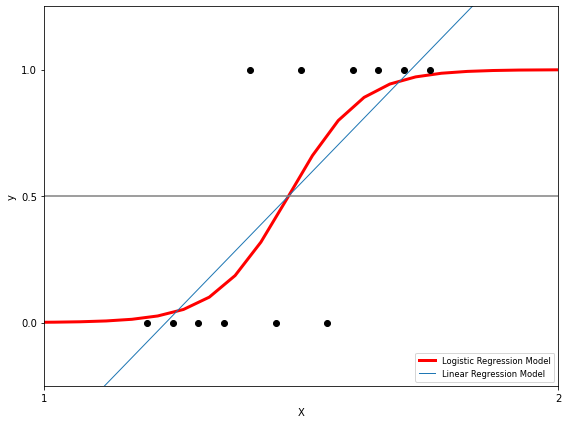

In [16]:
# Data 
X = np.array([1.2, 1.25, 1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75])
Y = np.array([0, 0, 0, 0, 1, 0 , 1, 0, 1, 1, 1, 1])
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(1, 3))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(1, 2)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

### Example:  

$$
\begin{align}
&(x_n, y_n) : \text{$n$ th learning data} \\
&x_n = (x_n 1)^T : \text{vector of $x_n$ with added dimension} \\
&w = (w_1 w_2) ^T : \text{parameters} \\
&\hat{y_n} = \frac{1}{1 + \exp(-w^Tx)} : \text{prediction} \\
&e_n^2 = \frac{1}{2}(\hat{y_n} - y_n)^2 = \frac{1}{2}(\frac{1}{1 + \exp(-w^Tx)} - y_n)^2  \\
&E = \frac{1}{2}\sum^N_{n=1}(\hat{y_n} - y_n)^2 = \frac{1}{2}\sum^N_{n=1}(\frac{1}{1 + \exp(-w^Tx)} - y_n)^2 
\end{align}
$$

The objective function is the total error $E$, and we want to differentiate this to minimize it. However, for logistic regressions, we do not find an analytical solution. Thus, we must approximate through recursion.  

*The Gradient Method*:  
* Feed an approximate solution
* Use gradient of approximation 
* gradually improve solution  

eg. gradient descent, conjugate gradient method, newton method (see DSGE lecture notes)  


![](images/gradient-method.jpg)

## Gradient Descent  

$$x_{i+1} - x_i - \alpha \nabla f(x_i) $$

where $\alpha$ is the learning rate.  
Iterate through this until $|x_{i+1} - x_i| < \epsilon$ for $\epsilon =$ tolerated error rate. 